In [2]:
from SGD import *

sgd = SGD(learning_rate=0.05)
sgd.train(xtrain, ytrain, batch_size=10, epoch_count=20)

Epoch: 0. Total error: 7.049880970787065
Epoch: 1. Total error: 3.10260124716219
Epoch: 2. Total error: 2.43406126852308
Epoch: 3. Total error: 2.115432638522957
Epoch: 4. Total error: 1.039244470061191
Epoch: 5. Total error: 1.0528290098179502
Epoch: 6. Total error: 1.0158446318463281
Epoch: 7. Total error: 1.5083161826124678
Epoch: 8. Total error: 3.5064360236424377
Epoch: 9. Total error: 0.6871442836381345
Epoch: 10. Total error: 1.0666330569816733
Epoch: 11. Total error: 1.584456010147803
Epoch: 12. Total error: 1.0193125077170138
Epoch: 13. Total error: 1.7824202701226233
Epoch: 14. Total error: 1.4456244143990955
Epoch: 15. Total error: 1.1146396086211632
Epoch: 16. Total error: 1.5672736538721466
Epoch: 17. Total error: 2.295380012308468
Epoch: 18. Total error: 1.779366241274387
Epoch: 19. Total error: 1.8815356674568087


In [3]:
sgd.weight

array([ 0.11641274,  0.91723467, -1.20484223])

100%|██████████| 10/10 [00:18<00:00,  1.86s/it]


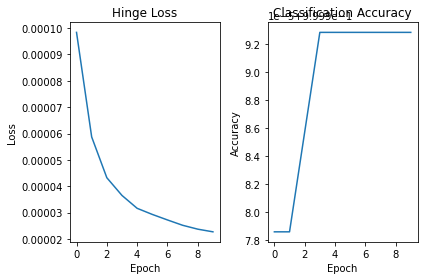

In [5]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

svm = LinearSVM(lr=0.1, C=0.1, max_iters=10, show_plot=False)
svm.train(xtrain, ytrain)

plt.subplot(1,2,1)
plt.title("Hinge Loss")
plt.plot(svm.losses)
plt.xlabel("Epoch"); plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Classification Accuracy")
plt.plot(svm.accuracies)
plt.xlabel("Epoch"); plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()